In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/pict/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.drop(columns = ['Ticket', 'Cabin', 'Embarked', 'Name', 'Sex']).cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

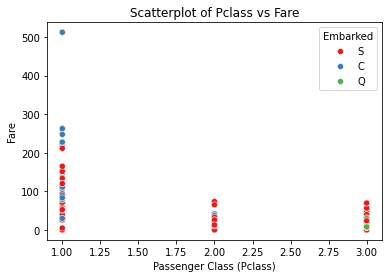

In [6]:
sns.scatterplot(x='Pclass', y='Fare', hue='Embarked', alpha=1, data=df, palette='Set1')

plt.title("Scatterplot of Pclass vs Fare")
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.legend(title='Embarked')
plt.show()


In [7]:
surGen = df.groupby('Sex')['Survived'].mean().reset_index()
surGen.columns = ['Sex', 'meanSurvived']
surGen

,Sex,meanSurvived
0,female,0.742038
1,male,0.188908


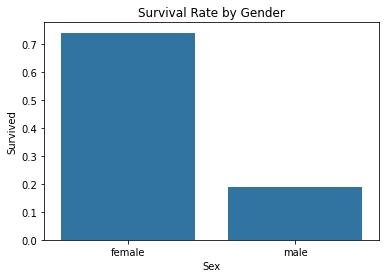

In [8]:
sns.barplot(x='Sex', y = 'meanSurvived', data = surGen)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

<AxesSubplot:>

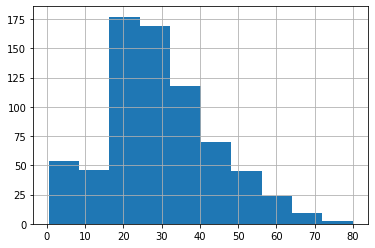

In [9]:
df['Age'].hist(bins=10)

In [10]:
surClass = df.groupby('Pclass')['Survived'].mean().reset_index()
surClass.columns = ['Pclass', 'meanSurvivedByClass']
surClass

,Pclass,meanSurvivedByClass
0,1,0.629630
1,2,0.472826
2,3,0.242363


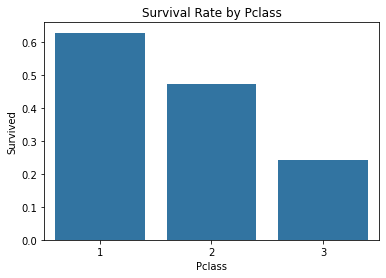

In [11]:
sns.barplot(x='Pclass', y = 'meanSurvivedByClass', data = surClass)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

In [12]:
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 91]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df["AgeGrp"] = pd.cut(df.Age, bins = bins, labels = labels)
df["AgeGrp"].value_counts()

AgeGrp
21-30    224
31-40    144
11-20    136
41-50     85
0-10      68
51-60     38
61-70     17
71-80      2
81-90      0
Name: count, dtype: int64

In [13]:
surAge = df.groupby('AgeGrp')['Survived'].mean().reset_index()
surAge.columns = ['AgeGrp', 'meanSurvivedByAge']
surAge

,AgeGrp,meanSurvivedByAge
0,0-10,0.573529
1,11-20,0.352941
2,21-30,0.388393
3,31-40,0.437500
4,41-50,0.388235
5,51-60,0.394737
6,61-70,0.235294
7,71-80,0.500000
8,81-90,NaN


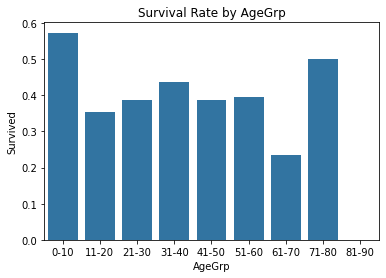

In [14]:
sns.barplot(x='AgeGrp', y = 'meanSurvivedByAge', data = surAge)
plt.title('Survival Rate by AgeGrp')
plt.xlabel('AgeGrp')
plt.ylabel('Survived')
plt.show()

<AxesSubplot:>

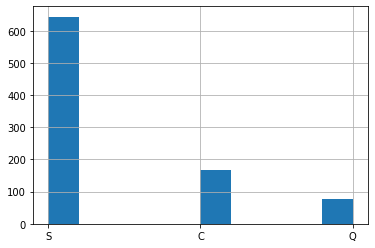

In [15]:
df['Embarked'].hist(bins = 10)

In [16]:
surPort = df.groupby('Embarked')['Survived'].mean().reset_index()
surPort.columns = ['Embarked', 'meanSurvivedByE']
surPort

,Embarked,meanSurvivedByE
0,C,0.553571
1,Q,0.389610
2,S,0.336957


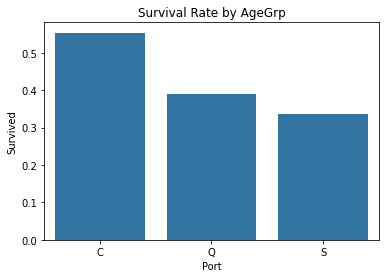

In [17]:
sns.barplot(x='Embarked', y = 'meanSurvivedByE', data = surPort)
plt.title('Survival Rate by AgeGrp')
plt.xlabel('Port')
plt.ylabel('Survived')
plt.show()

In [19]:
surSib = df.groupby('SibSp')['Survived'].mean().reset_index()
surSib.columns = ['SibSp', 'meanSurvivedBySib']
surSib

,SibSp,meanSurvivedBySib
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


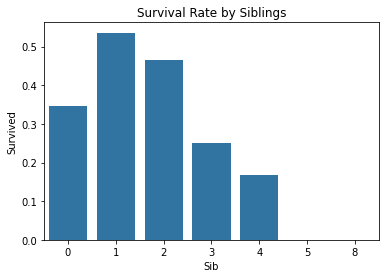

In [20]:
sns.barplot(x='SibSp', y = 'meanSurvivedBySib', data = surSib)
plt.title('Survival Rate by Siblings')
plt.xlabel('Sib')
plt.ylabel('Survived')
plt.show()

In [21]:
surPar = df.groupby('Parch')['Survived'].mean().reset_index()
surPar.columns = ['Parch', 'meanSurvivedByPar']
surPar

,Parch,meanSurvivedByPar
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


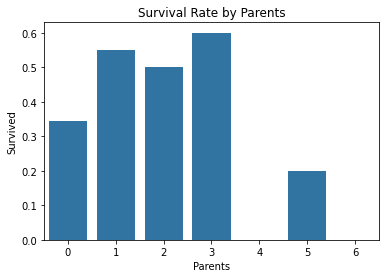

In [23]:
sns.barplot(x='Parch', y = 'meanSurvivedByPar', data = surPar)
plt.title('Survival Rate by Parents')
plt.xlabel('Parents')
plt.ylabel('Survived')
plt.show()